<div style="text-align:center">
    <h1>
        Value Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called value iteration. In it, we will sweep the state space and update all the V(s) values.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

import utils as utils
from envs import Maze
%matplotlib inline

## Initialize the environment

Create `Maze` Instance and print out the action and observation spaces

In [2]:
env = Maze()
env, env.action_space, env.observation_space

(<envs.Maze at 0x7fc2a86cfc70>, Discrete(4), MultiDiscrete([5 5]))

Clear the plot and show the frame

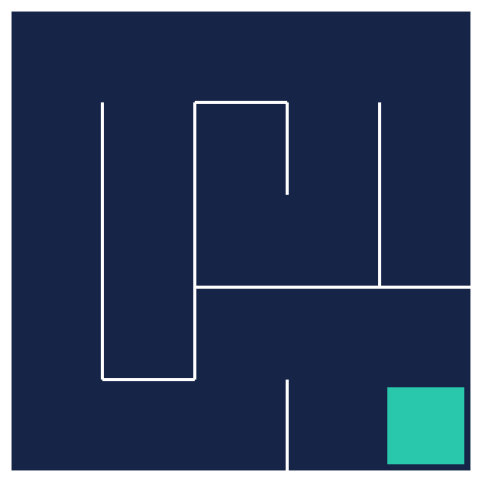

In [4]:
frame = env.render('rgb_array')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

Create a table with probability distribution for all actions for each state

In [20]:
policy_probs = np.full((5, 5, 4), 0.25)

# policy_probs = np.array([
#     ### row 0
#     [
#         [.25, .25, .25, .25], # col 0
#         [.25, .25, .25, .25], # col 1
#         [.25, .25, .25, .25], # col 2
#         [.25, .25, .25, .25], # col 3
#         [.25, .25, .25, .25], # col 4
#     ],
#     ### row 1
#     [
#         [.25, .25, .25, .25], # col 0
#         [.25, .25, .25, .25], # col 1
#         [.25, .25, .25, .25], # col 2
#         [.25, .25, .25, .25], # col 3
#         [.25, .25, .25, .25], # col 4
#     ],
#     ### row 2
#     [
#         [.25, .25, .25, .25], # col 0
#         [.25, .25, .25, .25], # col 1
#         [.25, .25, .25, .25], # col 2
#         [.25, .25, .25, .25], # col 3
#         [.25, .25, .25, .25], # col 4
#     ],
#     ### row 3
#     [
#         [.25, .25, .25, .25], # col 0
#         [.25, .25, .25, .25], # col 1
#         [.25, .25, .25, .25], # col 2
#         [.25, .25, .25, .25], # col 3
#         [.25, .25, .25, .25], # col 4
#     ],
#     ### row 4
#     [
#         [.25, .25, .25, .25], # col 0
#         [.25, .25, .25, .25], # col 1
#         [.25, .25, .25, .25], # col 2
#         [.25, .25, .25, .25], # col 3
#         [.25, .25, .25, .25], # col 4
#     ],
# ])

In [21]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [22]:
action_probabilities = policy((0, 1))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

In [ ]:
utils.test_agent(env, policy, episodes=1)    

#### Plot the policy

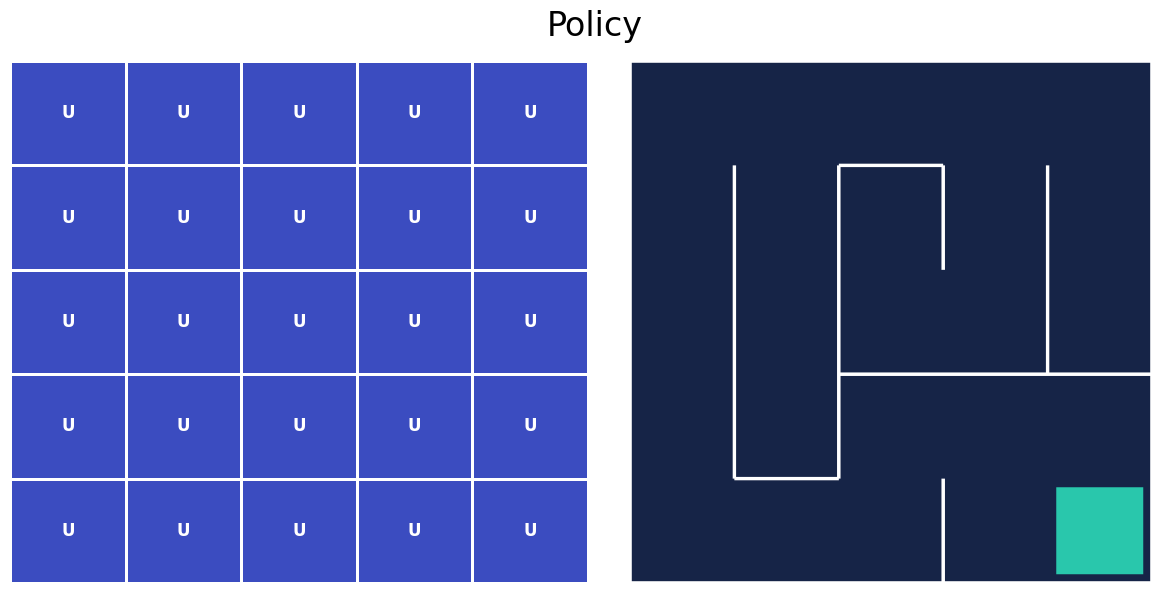

In [23]:
utils.plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [24]:
state_values = np.zeros(shape=(5,5))

# state_values = np.array([
#     [0, 0, 0, 0, 0], #row 0
#     [0, 0, 0, 0, 0], #row 1
#     [0, 0, 0, 0, 0], #row 2
#     [0, 0, 0, 0, 0], #row 3
#     [0, 0, 0, 0, 0], #row 4
# ]) # or simply np.zeros((5, 5))

#### Plot $V(s)$

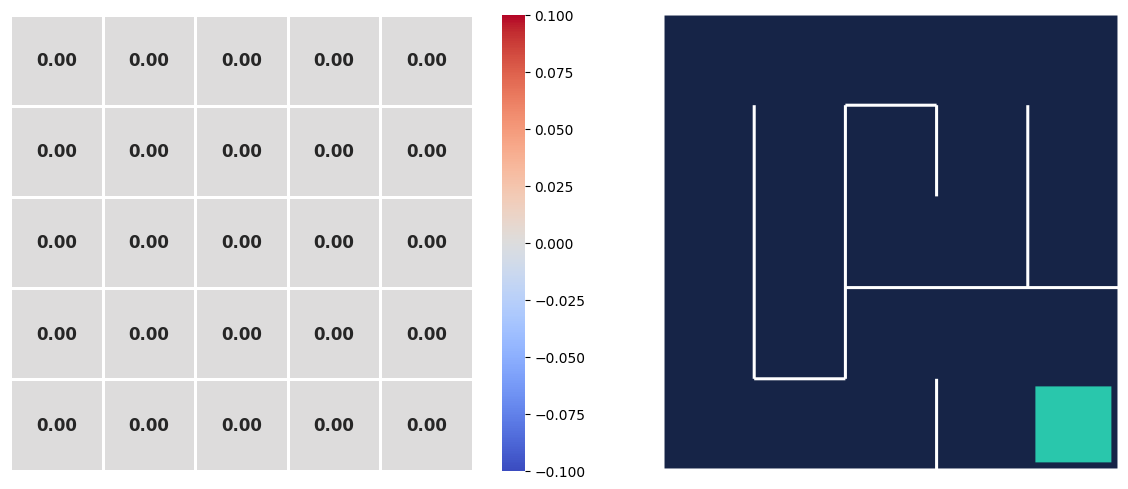

In [25]:
utils.plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


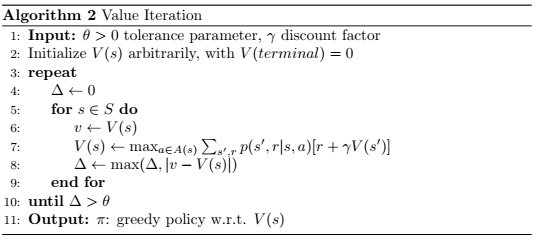

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [26]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float('inf')

    while delta > theta:
        delta = 0
        i = 1
        max_d = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float('-inf')

                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.

                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs

                delta = max(delta, abs(max_qsa - old_value))
                if delta > max_d: max_d = delta
        print(i, max_d)
        i+=1
# def value_iteration(probs, state_values, theta = 1e-4, gamma = .99):
#     delta = float("inf")
#     i = 1
#     while delta > theta:
#         delta = 0
#         max_d = 0
#         for row in range(5):
#             for col in range(5):
#                 old_value = state_values[(row, col)]
#                 action_probs = None
#                 max_qsa = float('-inf')

#                 # find out expected return for every action
#                 for action in range(4):
#                     next_state, reward, _, _ = env.simulate_step((row, col), action)
#                     qsa = reward + gamma * state_values[(next_state)]

#                     # if this action is the best, assign this as the policy action
#                     if qsa > max_qsa:
#                         max_qsa = qsa
#                         action_probs = np.zeros(4)
#                         action_probs[action] = 1.

#                 state_values[(row, col)] = max_qsa
#                 probs[(row, col)] = action_probs

#                 delta = max(delta, abs(max_qsa - old_value))
#                 if delta > max_d: max_d = delta
#         print(i, "max d:", max_d)
#         i += 1

In [27]:
value_iteration(policy_probs, state_values)

1 1.0
1 0.99
1 0.9801
1 0.9702989999999998
1 0.9605960100000002
1 0.9509900498999997
1 0.9414801494010003
1 0.93206534790699
1 0.9227446944279203
1 0.9135172474836413
1 0.9043820750088045
1 0.895338254258716
1 0.88638487171613
1 0.8775210229989678
1 0.868745812768978
1 0.8600583546412892
1 0.851457771094875
1 0


## Show results

#### Show resulting value table $V(s)$

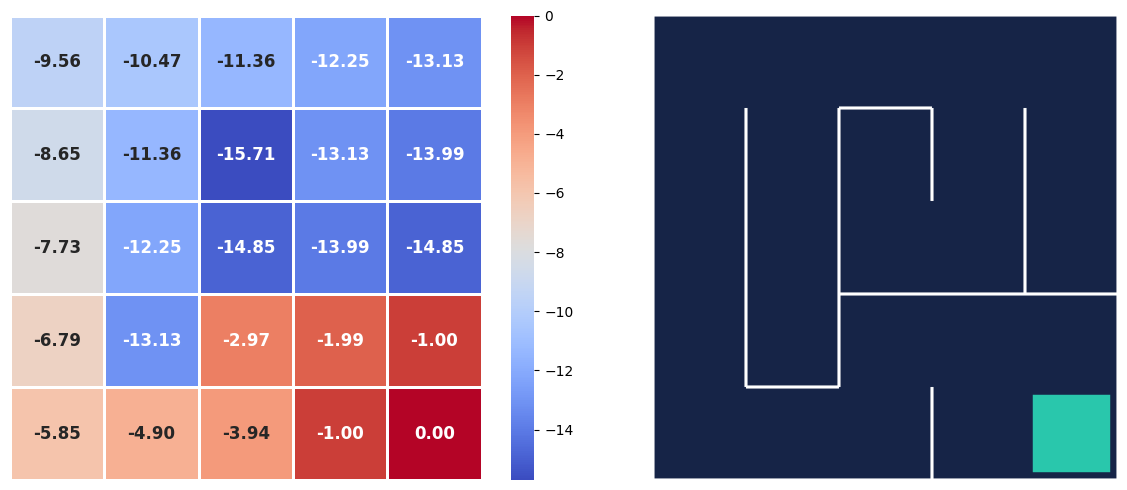

In [28]:
utils.plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

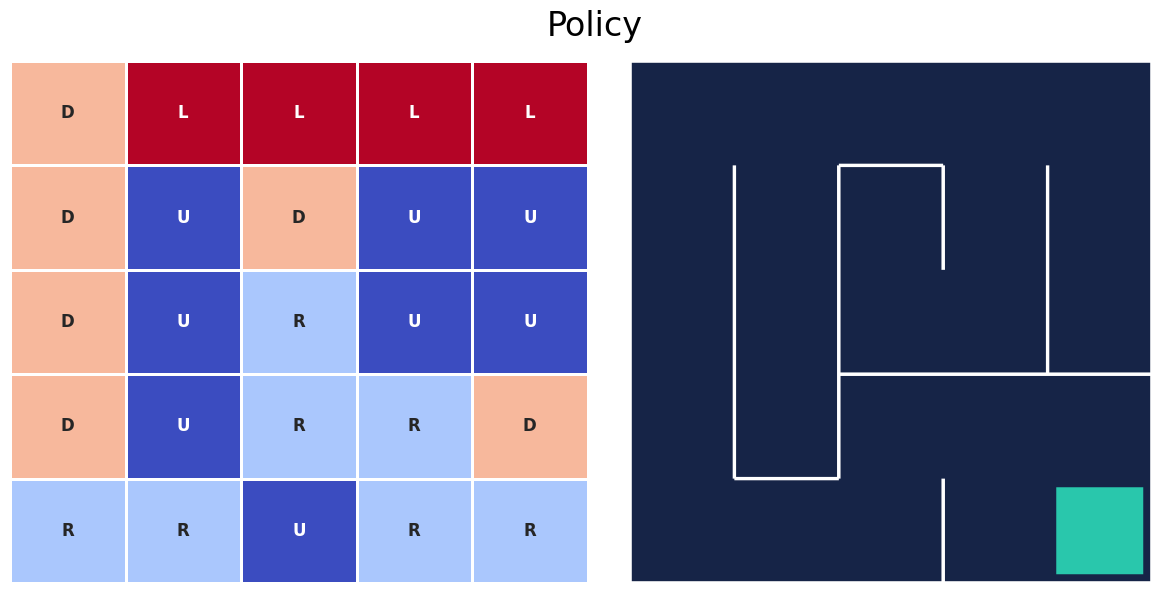

In [30]:
utils.plot_policy(policy_probs, frame)

#### Test the resulting agent

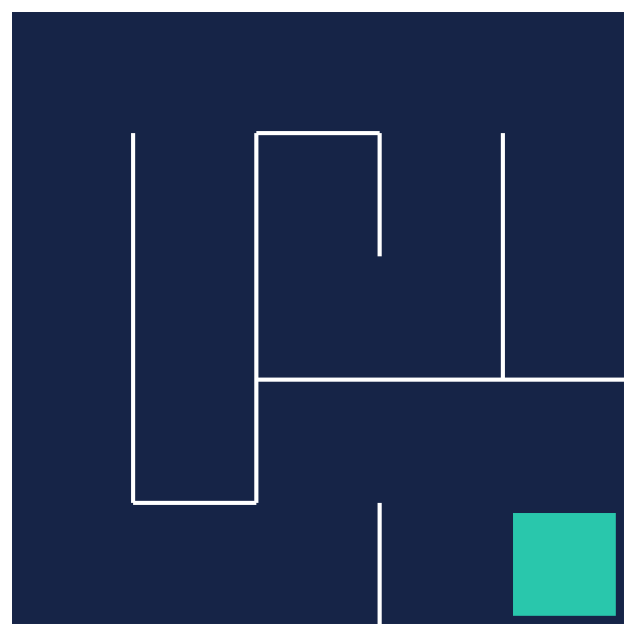

In [31]:
utils.test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)